# 项目：电影行业票房与利润调查

## 目录
<ul>
<li><a href="#intro">简介</a></li>
<li><a href="#wrangling">数据整理</a></li>
<li><a href="#eda">探索性数据分析</a></li>
<li><a href="#conclusions">结论</a></li>
</ul>

<a id='intro'></a>
## 简介

> 随着经济和科技发展以及人类生活方式的变迁，娱乐产业在过去的一个世纪迅猛发展，而电影行业已是当今娱乐产业的重要支柱。近年来，世界各国电影总票房屡创新高，也带来一些对影响电影行业利润因素的疑问。本报告将运用The Movie Database(TMDb)的电影行业大数据，对影响电影票房的因素，包括上映时间和口碑评分等方面进行剖析。

In [1]:
# 导入数据分析所需包
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')
% matplotlib inline

# 加载IMDb数据csv文件
df_movies = pd.read_csv('tmdb-movies.csv')

<a id='wrangling'></a>
## 数据整理


### 常规属性

In [2]:
# 显示数据前5行以确认数据格式
df_movies.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


**注：表格中budget_adj, revenue_adj为考虑通胀后以2010年基准美元计价的预算和票房。

In [3]:
# 显示 df_movies 的简明摘要，
# 包括每列非空值的数量
df_movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1

In [4]:
# 显示重复数据的数量
sum(df_movies.duplicated())

1

In [5]:
# 显示release_date的格式
df_movies['release_date'][0:5]

0      6/9/15
1     5/13/15
2     3/18/15
3    12/15/15
4      4/1/15
Name: release_date, dtype: object

In [6]:
# 显示电影时长或预算和票房均为零的无效数据数量
df_movies.query('runtime == 0 or budget == 0 and revenue == 0').count()[0]

4704


### 简化并标准化相关数据
> 根据上一步对电影数据的分析，数据中仅存在1条重复，删除不影响对数据分析的准确性，因此第一步可以删除重复的数据。第二步，为方便观察数据，应删除对电影数据分析无关的列，包括'id','imdb_id','homepage','tagline','keywords','overview',和'production_companies'。第三步，为减小无效数据对分析的影响，应删除电影时长或预算和票房均为0的数据。另外，release_date数据类型是object，应更改为datetime方便分析。

In [7]:
# 删除df_movies中唯一的重复电影数据
df_movies.drop_duplicates(inplace = True)

In [8]:
# 删除df_movies中的'popularity','id','imdb_id','original_title','homepage','tagline','keywords','overview',和'production_companies'列
columns = ['popularity','id','imdb_id','original_title','homepage','tagline','keywords','overview','production_companies']
df_movies.drop(columns, axis=1, inplace=True)

In [9]:
# 查找并删除时长为0或预算和票房均为0的行。
rows_of_zero = df_movies.query('runtime == 0 or budget == 0 and revenue == 0').index
df_movies.drop(index = rows_of_zero, inplace=True)

In [10]:
# 更改df_movies中release_date为datetime数据类型
df_movies['release_date'] = pd.to_datetime(df_movies['release_date'])

In [11]:
# 显示df_movies的前5行以确认修改
df_movies.head()

,budget,revenue,cast,director,runtime,genres,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,150000000,1513528810,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,2015-06-09,5562,6.5,2015,1.379999e+08,1.392446e+09
1,150000000,378436354,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120,Action|Adventure|Science Fiction|Thriller,2015-05-13,6185,7.1,2015,1.379999e+08,3.481613e+08
2,110000000,295238201,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,119,Adventure|Science Fiction|Thriller,2015-03-18,2480,6.3,2015,1.012000e+08,2.716190e+08
3,200000000,2068178225,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,136,Action|Adventure|Science Fiction|Fantasy,2015-12-15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,190000000,1506249360,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,137,Action|Crime|Thriller,2015-04-01,2947,7.3,2015,1.747999e+08,1.385749e+09


<a id='eda'></a>
## 探索性数据分析

> **提示** 在你完成数据整理和清理之后，现在可以进行探索性数据分析了。你需要计算统计值，创建可视化图表，解决你在一开始的简介部分中提出的研究问题。我们推荐你采用系统化方法。一次只探索一个变量，然后探索变量之间的关系。

### 探索1: 电影票房利润是否会受到上映时间影响？
    分析之前，我们先在df_movies中加入电影利润列。

In [12]:
# 在df_movies中创建考虑通胀后的电影利润列
profit_adj = df_movies['revenue_adj'] - df_movies['budget_adj']
df_movies.insert(3, 'profit_adj', profit_adj)

    电影上映时间可以指月份和年份。我们先分析电影票房利润与上映月份的关系。

In [13]:
# 在df_movies中创建上映月份列
months = df_movies['release_date'].dt.month
df_movies.insert(9, 'release_month', months)

In [14]:
# 计算每个月份上映电影的平均利润
mean_profits_per_month = df_movies.groupby('release_month').profit_adj.mean()

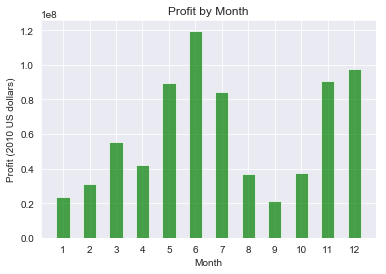

In [15]:
# 绘制每月平均利润的柱状图
ind = np.arange(12)
width = 0.5
plt.bar(ind, mean_profits_per_month, width, color='g', alpha=.7)
plt.ylabel('Profit (2010 US dollars)')
plt.xlabel('Month')
plt.title('Profit by Month')
labels = ['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12']
plt.xticks(ind, labels);

> 根据电影票房平均利润和月份之间的柱状图显示，6月是电影平均利润最高的月份且不同月份利润会有起伏。

 接下来我们根据电影年份进行利润分析。

In [16]:
# 计算每年上映电影的平均利润和总利润
mean_profits_per_year = df_movies.groupby('release_year')['profit_adj'].mean()
total_profits_per_year = df_movies.groupby('release_year')['profit_adj'].sum()

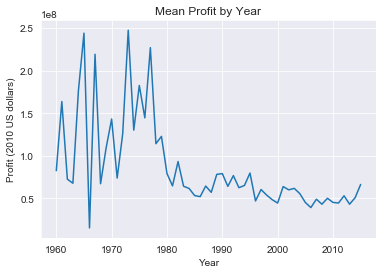

In [17]:
# 绘制每年电影平均利润的折线图
plt.ylabel('Profit (2010 US dollars)')
plt.xlabel('Year')
plt.title('Mean Profit by Year')
plt.plot(mean_profits_per_year)
plt.show();

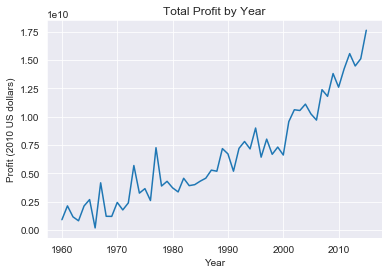

In [18]:
# 绘制每年所有电影总利润的折线图
plt.ylabel('Profit (2010 US dollars)')
plt.xlabel('Year')
plt.title('Total Profit by Year');
plt.plot(total_profits_per_year)
plt.show();

> 有意思的是虽然近些年电影上映的平均利润相比于上世纪60到80年代的更少，但是电影总利润却呈上升趋势。

### 探索2: 电影口碑越高票房就会越高吗？
    首先，我们将电影数据按照投票得分的高低分为极好、好、中、差四组，并观察这四组电影的票房特征。

In [19]:
# 查看投票量的统计数据
df_movies['vote_average'].describe()

count    6161.000000
mean        6.039831
std         0.871959
min         1.500000
25%         5.500000
50%         6.100000
75%         6.600000
max         8.400000
Name: vote_average, dtype: float64

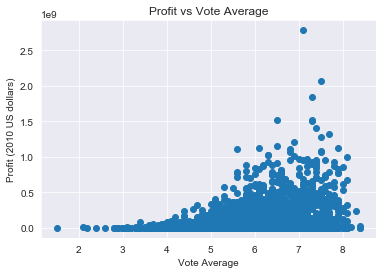

In [20]:
# 绘制投票评分与票房的散点图
plt.ylabel('Profit (2010 US dollars)')
plt.xlabel('Vote Average')
plt.title('Profit vs Vote Average')
plt.scatter(df_movies['vote_average'], df_movies['revenue']);

In [21]:
# 计算并显示四组电影的平均票房
excellent = df_movies.query('vote_average > 6.6').revenue_adj.mean()
good = df_movies.query('vote_average <= 6.6 and vote_average > 6.1').revenue_adj.mean()
neutral = df_movies.query('vote_average <= 6.1 and vote_average > 5.5').revenue_adj.mean()
poor = df_movies.query('vote_average <= 5.5').revenue_adj.mean()
revenues = [poor, neutral, good, excellent]
revenues

[36502884.7587839, 79351500.2655631, 102142065.65415485, 150317276.33494362]

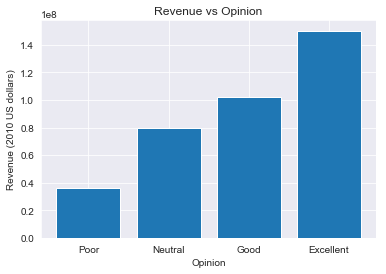

In [22]:
ind = np.arange(4)
plt.bar(ind, revenues)
plt.ylabel('Revenue (2010 US dollars)')
plt.xlabel('Opinion')
plt.title('Revenue vs Opinion')
labels = ['Poor', 'Neutral', 'Good', 'Excellent']
plt.xticks(ind, labels);

> 根据以上散点图和分类柱状图可以看出，电影口碑会影响到电影票房。

<a id='conclusions'></a>
## 结论

> **提示**：最后，你需要总结自己的调查结果。请确保你了解在探索过程中的局限性。如果尚未进行任何统计检验，不要做出任何统计结论。切记不要根据相关关系贸然推导出因果关系！

根据以上对TMDb电影数据的分析，电影的票房和利润会受到上映时间，如年份和月份，还有口碑评价的影响。由此可见，电影片商抢上映档期也是保证经济利益的表现，但是抢档期的同时也应该注重电影质量，提升作品的口碑。获得观众认可才是提升票房的关键。

**局限性论述**：本报告仅采用了TMDb的电影数据，分析使用了绘图和描述统计数据，存在数据不全和缺少对结果反复论证的局限性。

In [23]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0